In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../csv/Reviews.csv')

In [3]:
df.head()

,App Package Name,Reviews,Reviews Content,Rating,Start Date,End Date,Review Product Version,Review Product Version Name,Language,Language Name
0,com.mercadolibre,001f8932-2e94-487f-9f67-b50cae7e5428,Ele so e difícil para abrir,1,15.07.22,15.07.22,20600000011511_Unknown,Unknown,pt,Portuguese
1,com.mercadolibre,0025d144-86f4-4cbc-bc73-1166a07cc8be,muito bom,5,16.07.22,16.07.22,20600000011511_10.217.2,10.217.2,pt,Portuguese
2,com.mercadolibre,004d0554-0b5b-47d2-bb35-648deb2bd573,Tico 1313,1,10.07.22,10.07.22,20600000011511_10.217.2,10.217.2,pt,Portuguese
3,com.mercadolibre,004f8dc5-348c-4fa2-9da2-aeec6c8e71cc,bom prazo em dias,5,13.07.22,13.07.22,20600000011511_10.217.2,10.217.2,pt,Portuguese
4,com.mercadolibre,00a22861-1d1e-47aa-a40b-1ce981be06cc,ótimo,5,10.07.22,10.07.22,20600000011511_10.208.2,10.208.2,pt,Portuguese


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19091 entries, 0 to 19090
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   App Package Name             19091 non-null  object
 1   Reviews                      19091 non-null  object
 2   Reviews Content              19091 non-null  object
 3   Rating                       19091 non-null  int64 
 4   Start Date                   19091 non-null  object
 5   End Date                     19091 non-null  object
 6   Review Product Version       19091 non-null  object
 7   Review Product Version Name  19091 non-null  object
 8   Language                     19091 non-null  object
 9   Language Name                19091 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.5+ MB


In [5]:
#Dropping unnecessary columns
df.drop(labels=['Reviews', 'Review Product Version','Review Product Version Name',\
                'Language','Language Name','Start Date','End Date'], axis=1, inplace=True)

In [6]:
# Assigning app ranking from previous analysis
# Creating a mapping dictionary
label_mapping = {'com.zzkko': 'First', 'com.shopee.br': 'Second', 'com.mercadolibre': 'Third'}
# Adding new ranking column
df['Ranking'] = df['App Package Name'].map(label_mapping)

In [7]:
# Converting rating from int to object
df['Rating'] = df['Rating'].astype('str')

In [8]:
df['App Package Name'].value_counts()

App Package Name
com.shopee.br       12285
com.zzkko            5005
com.mercadolibre     1801
Name: count, dtype: int64

In [9]:
# Although the Shein app ranks first among e-commerce apps, Shopee has more than twice as many reviews in the same period.
# Checking ratings: values range from 1 to 5, with 5 being the highest score.
df['Rating'].value_counts(normalize=True)

Rating
5    0.752711
1    0.115866
4    0.063957
3    0.038290
2    0.029176
Name: proportion, dtype: float64

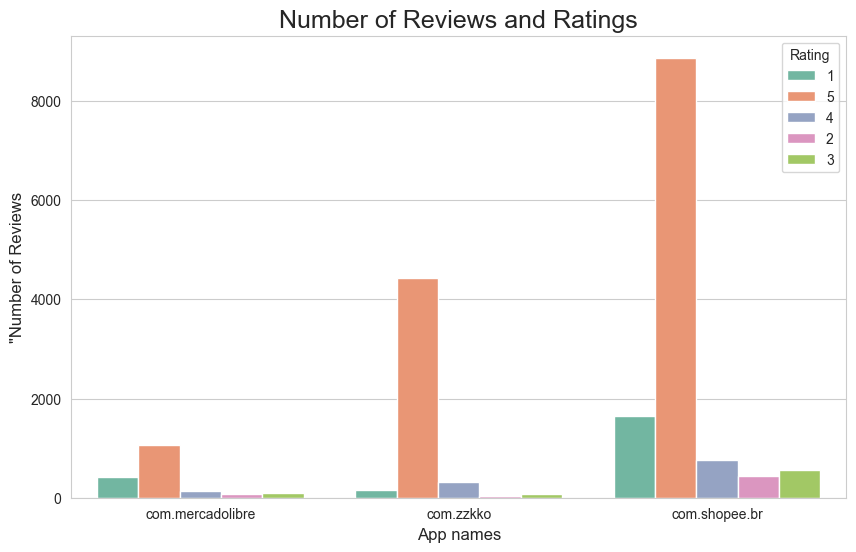

In [10]:
# The highest rating has nearly 7 times more reviews than the lowest one, indicating a tendency for users to like the apps.
# Let's check the values broken down by app and rating.

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.set_palette('Set2')
sns.countplot(x='App Package Name', hue='Rating', data=df)
plt.title('Number of Reviews and Ratings', fontdict={'family': 'Arial', 'size': 18})
plt.xlabel('App names', fontdict={'family': 'Arial', 'size': 12})
plt.ylabel('"Number of Reviews', fontdict={'family': 'Arial', 'size': 12})
plt.show()

In [11]:
# Shopee has a significantly higher absolute number of positive reviews compared to other apps
# Mercado Livre has a proportionally higher number of negative reviews than its competitors

mask = df['App Package Name'] == 'com.mercadolibre'
df_mercado_livre = df.loc[mask]
df_mercado_livre['Rating'].value_counts(normalize=True)


Rating
5    0.594670
1    0.232649
4    0.078290
3    0.050527
2    0.043865
Name: proportion, dtype: float64

In [12]:
mask = df['App Package Name'] == 'com.zzkko'
df_shein = df.loc[mask]
df_shein['Rating'].value_counts(normalize=True)

Rating
5    0.884316
4    0.063736
1    0.029570
3    0.015385
2    0.006993
Name: proportion, dtype: float64

In [13]:
mask = df['App Package Name'] == 'com.shopee.br'
df_shopee = df.loc[mask]
df_shopee['Rating'].value_counts(normalize=True)

Rating
5    0.722263
1    0.133903
4    0.061945
3    0.045828
2    0.036060
Name: proportion, dtype: float64

# Pre-processing Sentiment Analysis

In [14]:
# Shopee has significantly more reviews than its competitors, despite ranking second overall
# Around 75% of all reviews give the highest score of 5
# Mercado Livre has fewer reviews in absolute numbers, but the frequency of lowest-score reviews is 10 percentage points higher than 
# Shopee and 17 percentage points higher than Shein
# These data provide a general sense of user sentiment towards the top 3 apps

import re
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

In [15]:
stemmer = PorterStemmer()

In [16]:
stop_words = set(stopwords.words("portuguese") + list(string.punctuation))

In [17]:
df_nlp = df.copy()

In [18]:
import spacy

# Load the Portuguese language model in spaCy
nlp = spacy.load("pt_core_news_sm")

In [19]:
def remove_verbs(text):
    # Process the text with spaCy
    doc = nlp(text)
    # Create a list to store non-verbal words
    non_verb_words = []
    # Iterate over the tokens in the document
    for token in doc:
        # If the word is not a verb, add it to the list
        if token.pos_ != "VERB":
            non_verb_words.append(token.text)
    # Join the remaining words into a single string
    cleaned_text = " ".join(non_verb_words)
    return cleaned_text

In [20]:
custom_stop_words = ["pra", 'não', "para","shopee", "shope",'app','o']

In [28]:
# Pre-processing function
def preprocess_text(text):
    # Remove links
    text = re.sub(r'(http|www).*', '', text)
    # Remove HTML, if any
    #text = BeautifulSoup(text, "lxml").get_text()
    # Remove repetion 
    text = re.sub(r'\b(\w+)( \1\b)+', r'\1', text)
    # Remove verbs
    text = remove_verbs(text)
    # Divide the text in a word list 
    words = text.split()
    # Remove stop words
    filtered_words = [word for word in words if word not in stop_words and word not in custom_stop_words]
    # Apply steemer to the words
    stemmed_words = [stemmer.stem(word) for word in filtered_words]
    # Join all steemers words in to one text
    processed_text = " ".join(stemmed_words)
    return processed_text


In [ ]:
# Aplique a função de pré-processamento à coluna "review" do DataFrame
df_nlp["review_processed"] = df["Reviews Content"].apply(preprocess_text)

In [26]:
df_nlp

,App Package Name,Reviews Content,Rating,Ranking
0,com.mercadolibre,Ele so e difícil para abrir,1,Third
1,com.mercadolibre,muito bom,5,Third
2,com.mercadolibre,Tico 1313,1,Third
3,com.mercadolibre,bom prazo em dias,5,Third
4,com.mercadolibre,ótimo,5,Third
...,...,...,...,...
19086,com.shopee.br,Estou amando comprar na shopee,5,Second
19087,com.shopee.br,"No início preços eram bons ,cupom frete grátis...",1,Second
19088,com.shopee.br,"Ótimo, só falta um chat pra tirar dúvidas com ...",5,Second
19089,com.shopee.br,Muito bom,1,Second


# WordCloud

In [23]:
from wordcloud import WordCloud

In [24]:
text = df_nlp['review_processed'].sum()

In [25]:
wordcloud = WordCloud(background_color='white').generate(text)

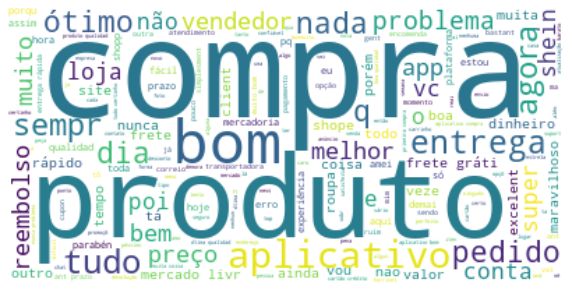

In [26]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [27]:
# Some standout words include: product, app, good, purchase, delivery, very good, great, free shipping, problem, refund, very
# We can conclude that Brazilian users are generally satisfied with the service provided by the main apps
# Word count

from collections import Counter

In [28]:
all_reviews = " ".join(df_nlp["review_processed"])

In [29]:
word_count = Counter(all_reviews.split())

In [30]:
for word, count in word_count.items():
    print(f"{word}: {count}")

ele: 65
so: 90
difícil: 91
bom: 3937
tico: 3
1313: 1
prazo: 565
dia: 729
ótimo: 2258
não: 651
conta: 407
mercado: 438
livr: 363
milhõ: 7
foto: 122
cnh: 5
qualquer: 80
nenhuma: 90
loja: 433
...: 920
e: 402
outra: 181
compra: 3286
vc: 360
lixo: 77
horrível: 177
....: 204
programa: 3
..: 409
veze: 435
pani: 1
tela: 36
preta: 4
vai: 171
client: 300
opção: 161
pago: 25
pagamento: 252
limit: 28
chateada: 20
poi: 328
sempr: 923
parcela: 17
é: 256
ótima: 613
equip: 33
andorinha: 1
verão: 1
conjunto: 6
pessoa: 129
responsávei: 10
todo: 449
zona: 4
conforto: 6
segurança: 79
casa: 131
excelent: 856
👏: 757
muito: 2371
o: 970
aplicativo: 1853
sozinho: 29
fiz: 61
chip: 3
aparelho: 22
posta: 1
restant: 7
ou: 12
serviço: 100
locker: 1
são: 34
correio: 178
nao: 365
modalidad: 6
pf: 1
melhor: 1132
forma: 135
net.confianca: 1
preço: 1069
qualidad: 1014
100: 44
°: 14
\•: 1
gráti: 495
até: 226
present: 21
momento: 180
satisfeita: 148
prestação: 6
parabén: 341
q: 566
produto: 2653
ant: 484
top: 538
1000: 25

polícia: 1
quem: 10
notificação: 13
falsa: 9
cpf: 18
condomínio: 4
acabei: 4
bermuda: 2
mascolina: 1
devov: 1
pop-up: 1
constant: 8
experiencia: 18
pessima: 7
loko: 1
entendi: 1
homem: 3
119: 1
19.90: 1
10/7: 1
irresponsabilidad: 3
iz: 1
shoop: 43
agosto: 4
cancelei: 7
telha: 1
000: 1
0000: 1
sat: 3
.não: 4
distrito: 1
disponibilidad: 4
mudança: 5
drástica: 1
gestão: 1
atual: 7
assídua: 7
tirei: 1
folga: 2
dor: 41
alg: 1
específica: 3
🥉: 1
bahia: 2
derepent: 1
💕: 27
rapida: 8
preguiçoso: 1
desempregado: 1
483,64: 1
proteção: 4
autorizo: 1
vinculado: 1
solicito: 1
urgência: 5
origin: 3
paí: 11
desistência: 1
nestant: 1
vendor: 4
mau: 11
toa: 2
comprem: 3
5dia: 1
imensa: 9
extrato: 1
saldo: 5
.outra: 1
serem: 17
retirada: 2
cansativo: 3
entrego: 2
fiwuei: 1
imagem: 8
lotérica: 1
honesto: 9
olho: 12
avista: 3
10/07/2022: 2
prest: 1
servia: 1
saia: 6
estress: 2
ônibu: 1
ir: 10
passagem: 2
animado: 1
estregador: 1
estao: 6
pessimos!!!!desabafo: 1
cadrast: 1
kodigo: 1
validação: 3
garantia: 

memória: 3
tudoooo: 5
ameiiiiiiiiii: 1
alexsandra: 1
faria: 3
roxa: 1
gostado: 2
prestativo: 8
pontuaçõ: 1
média: 3
muito!: 1
classificaçõ: 1
atrativo: 9
maravilhada: 2
dad: 1
medoo: 1
apê: 1
opn: 1
muiiitoo: 1
☼: 1
reia: 2
optima: 2
garai: 1
plmd: 1
divergem: 1
numa: 1
desconfiei: 3
too: 1
on-lin: 11
variação: 8
maravilhosooo: 3
solícito: 1
ea: 1
maravilho: 5
ameiiiiiiiiiiiiii: 1
postagem: 14
estimativa: 1
mercedo: 1
25/06/2022: 1
aconselho: 2
macacão: 1
visto: 6
odi: 1
facebook: 4
️!!!sjhshsksbsbajaoahahsbsnsishdhsbdkoshajsmbdjdodhsbnslsgsvajoajsvsksoqjsgsvbdldjdvdbsksowhwveldoidbd: 1
dksoshsbsbebsksushwnenskksbakaoalabwbnwjwkdkdx: 1
bdhssuisiwiwiwiwiwiwiowiwjehehebbejskaoaisjsgsgbebebejskaoowlwkwmenenebvrbdbdudududydisooamsndbebenkelwpqiwhebrnoeiehhsbebdndnldkskakbdvdksjeowlsnsbdvvejsosoksjrbrbdjosowjdbdvrbrnkaowoejehbrnrjrjrjrbvsjaoeshrbkalsjvenslslsjjenelskskksksbrhwsjshwuosjsbdksjabbsksosjssjsjndndjwehiroeksbdbdhdhdjdhehehdhdhddhdhdh: 1
sho: 4
.mai: 4
45.: 1
ted: 1
piqu: 1
plicat

store: 1
qto: 1
recomendo!!!nota: 1
toqu: 4
tortura: 2
server: 1
amigável: 1
tintura: 1
evento: 1
01/07: 1
16/7: 1
ortopédica: 1
imprescindível: 1
de++++++: 1
fxv.cccpo: 1
favil: 1
difil: 1
aliexpre: 1
melho: 2
otimizado: 3
otimização: 3
appk: 1
sacola: 3
projeto: 1
smart: 2
adorou.facio: 1
noivo: 1
regularment: 1
faço: 3
estar: 2
legau: 1
estrella: 1
econômica: 4
goup: 1
avacalharsm: 1
comentario: 4
70,00: 2
compramo: 1
segmento: 1
indiscutivelment: 1
14/07/2022,,,,app: 1
réza: 1
jack: 1
chan: 3
recompensaçao: 1
ticket: 1
reijatacao: 1
booom: 2
kih: 1
disponivel: 2
sacana: 1
reembolso$$: 1
tive: 3
sô: 2
minino: 1
appp: 1
topíssimo: 1
pontuo: 1
toc: 1
pin: 2
adorooooooooo: 2
tira: 1
parceira: 6
iso: 1
deixo: 8
.vc: 1
belo: 4
diariament: 1
bye: 1
efermagem: 1
fff: 1
aparti: 3
dupla: 2
bagulho: 1
slk: 1
ineficiência: 1
reclama: 2
comerciant: 2
féria: 2
perca: 5
imediata: 2
fotografia: 1
ato: 4
realização: 2
porvaria: 1
falam: 1
asessivel: 1
fingem: 1
ninguem: 2
decepionado: 1
ordem: 1
ak

descent: 1
1:9: 1
ce: 1
apouco: 1
ribeirão: 1
8º: 1
4,dia: 1
25/07: 1
dias!lamentáv: 1
lagau: 1
caloteiro: 2
mentem: 2
simmm: 1
39,99: 3
1000000000000000000: 1
transportadoraa: 1
perímetro: 1
urbano: 1
localidad: 1
administração: 1
corrida: 1
laiv: 1
9²+2: 1
3££: 1
♧: 1
{•: 1
•: 1
ofertas.muita: 1
.tô: 1
concernent: 1
vive: 1
recusa: 5
eram: 1
lentament: 1
falei: 1
deletado: 1
ferra: 2
cupão: 1
pendriv: 2
bouri4: 1
geavado: 1
recam: 1
30/05/2022: 1
totaaaaaaaaal: 1
falcatrua: 1
série: 1
planeta: 2
muitoóo: 1
recent: 1
saiba: 1
excesso: 1
bilhar: 1
inresponsalvel: 1
renbolso: 1
.pode: 1
rum: 1
magoti: 1
pk: 1
motorista: 1
braro: 1
uauuuuu: 1
maravilhosoo: 1
elétrica: 1
rica: 1
emissora: 1
titulo: 1
peso: 1
classificaçao: 1
pfff: 1
assi: 1
mun: 1
maisssss: 1
pq?até: 1
shopeelixo: 1
shoppi: 1
.minha: 1
certinhonao: 1
.demora: 1
abrigado: 1
³5rrrez5t?f????%: 1
t22!÷@!2²a2442²3///: 1
vw³÷6: 1
٪: 1
indagaçõ: 1
marco: 1
antencioso: 1
olhadinhaaa: 1
shoow: 1
traumatizant: 1
ligam: 1
recebe.rid

In [31]:
# Escolha as palavras mais frequentes
most_common_words = word_count.most_common(10)
most_common_words

[('bom', 3937),
 ('compra', 3286),
 ('produto', 2653),
 ('muito', 2371),
 ('ótimo', 2258),
 ('aplicativo', 1853),
 ('tudo', 1334),
 ('entrega', 1280),
 ('melhor', 1132),
 ('preço', 1069)]

In [32]:
common_words = pd.DataFrame(most_common_words)

In [33]:
common_words

,0,1
0,bom,3937
1,compra,3286
2,produto,2653
3,muito,2371
4,ótimo,2258
5,aplicativo,1853
6,tudo,1334
7,entrega,1280
8,melhor,1132
9,preço,1069


In [34]:
# Word Cloud melhores ratings
df_best= df_nlp[df_nlp['Rating'] == '5']

In [35]:
text_best = df_best['review_processed'].sum()

In [36]:
wordcloud_best = WordCloud(background_color='white').generate(text_best)

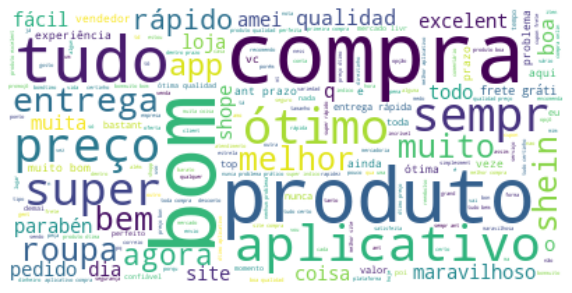

In [37]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_best, interpolation='bilinear')
plt.axis("off")
plt.show()

In [38]:
best_reviews = " ".join(df_best["review_processed"])

In [39]:
best_word_count = Counter(best_reviews.split())

In [40]:
for word, count in word_count.items():
    print(f"{word}: {count}")

ele: 65
so: 90
difícil: 91
bom: 3937
tico: 3
1313: 1
prazo: 565
dia: 729
ótimo: 2258
não: 651
conta: 407
mercado: 438
livr: 363
milhõ: 7
foto: 122
cnh: 5
qualquer: 80
nenhuma: 90
loja: 433
...: 920
e: 402
outra: 181
compra: 3286
vc: 360
lixo: 77
horrível: 177
....: 204
programa: 3
..: 409
veze: 435
pani: 1
tela: 36
preta: 4
vai: 171
client: 300
opção: 161
pago: 25
pagamento: 252
limit: 28
chateada: 20
poi: 328
sempr: 923
parcela: 17
é: 256
ótima: 613
equip: 33
andorinha: 1
verão: 1
conjunto: 6
pessoa: 129
responsávei: 10
todo: 449
zona: 4
conforto: 6
segurança: 79
casa: 131
excelent: 856
👏: 757
muito: 2371
o: 970
aplicativo: 1853
sozinho: 29
fiz: 61
chip: 3
aparelho: 22
posta: 1
restant: 7
ou: 12
serviço: 100
locker: 1
são: 34
correio: 178
nao: 365
modalidad: 6
pf: 1
melhor: 1132
forma: 135
net.confianca: 1
preço: 1069
qualidad: 1014
100: 44
°: 14
\•: 1
gráti: 495
até: 226
present: 21
momento: 180
satisfeita: 148
prestação: 6
parabén: 341
q: 566
produto: 2653
ant: 484
top: 538
1000: 25

demorado: 5
primeiro: 27
cunhado: 1
vantagen: 10
4x: 2
emr$: 1
251,27: 1
1.180,49+r$251,37: 1
vazamento: 1
social: 9
qua: 2
olatao: 1
tiro: 4
desepcionado: 1
xompra: 1
1995: 1
entrada: 5
perfi: 2
falso: 9
prontobo: 1
inteira: 1
acontecimento: 1
bomm: 17
inúmera: 7
facilidad: 52
brind: 10
porumaparceia1: 1
😘: 81
1800: 1
unidad: 3
deficil: 1
vlr: 1
provável: 1
peço: 13
moda: 12
21: 2
quesito: 11
comun: 1
paraben: 16
criador: 7
uai: 2
instant: 4
op: 2
beleza: 6
som: 2
mondial: 1
que?a: 1
mãe: 11
comtrol: 1
daqui: 8
prá: 2
mapa: 2
localização: 15
pasta: 3
operação: 2
versatil: 1
cabimento: 1
recomendo,.só: 1
dou: 27
estrela.oorqu: 1
infelisment: 2
invasivo: 1
demora: 119
pozsetiva: 1
perto: 6
enquanto: 66
caminhõ: 1
madrugada: 4
baixa: 18
banstant: 1
gonsigi: 1
milhar: 7
ficou: 4
fone: 12
bluetooth: 3
pedro: 1
leopoldo: 1
início: 29
😎: 17
pqeu: 1
liberado: 2
robôfoot: 1
medio: 1
perdi: 34
logado: 1
aff: 18
ágil: 12
poqu: 1
descaso: 21
fvdhkvddvju: 1
san: 1
cristo: 1
bb: 2
su: 1
xu: 1
fd: 1

sheen: 2
serteça: 1
usa-lo: 1
frequência: 5
vivament: 1
compatível: 2
206: 1
.r: 1
muito<3: 1
mia: 1
compraaaaaasss: 1
categorizado: 1
mimo: 3
compradora: 6
size: 3
amei<3: 1
maravilhosament: 1
acessivel: 4
armário: 1
bugada: 5
tabela: 3
parq: 1
nubca: 1
resalva: 1
confusa: 3
15dia: 1
louca: 5
🦾: 1
mano: 7
perfeição: 6
gostoso: 1
produtor: 3
apoio: 4
mochila: 3
amam!: 1
perfeitaaa: 1
encontrado: 1
🙃: 2
tirarno: 1
mera: 1
ilusao: 1
rembolso: 7
muuuiito: 1
amazona: 1
manau: 1
lisboa: 1
porto: 1
açor: 1
coleçõ: 1
excecion: 1
estrangeiro: 1
opço: 1
fase: 3
váaario: 1
produtinho: 4
futurament: 3
✷: 2
‿: 1
isso.: 1
╰: 1
(＾3＾: 1
╯: 1
sen: 1
dmss: 1
🌚: 1
dez!: 1
adulta: 1
adereço: 1
automóvei: 1
feedback: 2
maravilhosaaaaah: 1
ideal: 1
roupaa: 2
pesquisar)o: 1
fortement: 1
aproveitem: 1
anéi: 3
y: 2
you: 9
lequ: 1
horivel: 1
particularment: 2
abaixei: 1
validad: 1
demaissss: 1
fiavel: 2
feminina: 2
tendência: 3
jóia: 3
preocupado: 4
🅰: 1
🅼: 1
🅴: 3
🅸: 1
🅿: 1
🆁: 1
🅵: 1
🅲: 1
🆃: 1
a.o: 1
pronom: 1

pequeno"ma: 1
campanha: 6
7h: 1
con: 2
wh: 1
câmara: 1
shoopp: 1
beggin: 1
aceita: 3
débito: 4
pfvv: 2
😰: 3
princípio: 3
sobrinho: 1
sepreciso: 1
muito.bom: 2
trava: 5
cabulosa: 1
esto: 2
dinâmico: 2
limpo: 4
aa: 1
amoroso: 1
demaii: 1
lentooo: 1
jogu: 1
partida: 1
ativo: 3
trouxa: 4
varier6d: 1
últimament: 2
😈: 2
ㅓ호ㅓ: 1
infinita: 1
exenlent: 1
semiarm: 1
1/1: 1
2/2: 1
3/3: 1
4/4: 1
sucessivament: 1
profissionai: 1
somo: 1
havan: 1
resgat: 3
29,90: 5
movél: 1
bommmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmnmmmmmmmmmmmmmmmmmnmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmnmmmmmmmmmmmmmmmmmmmmmmmmmmmmmnmnmmmmmmmmnmmmmm: 1
mensalment: 1
dezena: 1
viável: 2
bém: 1
abemçõ: 1
volta:/: 1
instrução: 2
vizinha: 2
coloqu: 2
embaixo: 1
lag: 1
interpretada: 1
liga: 3
manda: 3
conseguido: 1
deveria: 3
vocei: 1
terrivel: 2
muuuuuuito: 1
preocupação: 1
vece: 2
parei: 1
caramba: 4
1000,sempr: 1
isto: 2
estouro: 1
🌎: 1
pe

util: 1
beauti: 1
today.br: 1
11/07: 2
otm: 1
especificaço: 1
rapidao: 1
correeio: 1
arroz: 1
02/06/2022: 1
1h: 2
.00: 1
digita: 1
fita: 2
veda: 2
rosca: 2
mostra: 1
isolant: 1
incompetent: 3
quinheta: 1
bb34: 1
bebê4: 1
84: 1
3ejđmr: 1
iguatu: 1
y8jmkmmmmmimmmmmmmmmki6766yi6yy8m88mñmnnñn999999999jn55nnñnnhhnnn5nhyyg: 1
perigoso: 2
pode: 1
economizo: 1
rastreabilidad: 1
ódio: 2
lucrar: 1
razõ: 1
coisas:3333: 1
atomizador: 2
adeu: 2
ujunior: 1
delay: 1
naquel: 1
limitado: 1
comprar.o: 1
cumpon: 2
deslealdad: 1
recompensa: 1
:/: 2
quinz: 1
71: 1
renbouso: 1
2compra: 1
semilar: 1
.parabén: 1
30/06/22: 1
questionamento: 2
comprar.nao: 1
munto: 1
desamina: 1
antes.mai: 1
.fora: 1
atecioso: 1
atenciosa: 2
murici: 1
verniz: 1
shoppei: 1
tmnc: 2
benga: 1
yg: 1
presa: 1
salvador: 2
camaçari: 1
lauro: 1
ngm: 3
contudo: 2
vendi: 1
paçoca: 1
condenado: 1
font: 1
juntei: 1
bíblia: 1
tralha: 1
inquenmavel: 1
push: 1
ativado: 1
súper: 1
limpei: 2
-boa: 1
inocência: 1
bugano: 1
cadastra: 2
pvfr: 1
mun

In [55]:
best_common_words = best_word_count.most_common(12)
best_common_words

[('bom', 3154),
 ('muito', 2041),
 ('ótimo', 2016),
 ('compra', 1968),
 ('produto', 1654),
 ('aplicativo', 1124),
 ('tudo', 1051),
 ('melhor', 954),
 ('qualidad', 903),
 ('preço', 877),
 ('excelent', 806),
 ('super', 776)]

In [56]:
# Word Cloud pior ratings
df_worst= df_nlp[df_nlp['Rating'] == '1']

In [57]:
text_worst = df_worst['review_processed'].sum()

In [58]:
wordcloud_worst = WordCloud(background_color='white').generate(text_worst)

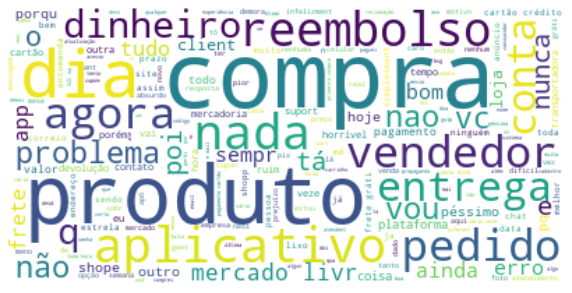

In [59]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_worst, interpolation='bilinear')
plt.axis("off")
plt.show()

In [60]:
worst_reviews = " ".join(df_worst["review_processed"])

In [61]:
worst_word_count = Counter(worst_reviews.split())

In [62]:
for word, count in worst_word_count.items():
    print(f"{word}: {count}")

ele: 26
so: 28
difícil: 45
tico: 2
1313: 1
não: 359
conta: 206
mercado: 184
livr: 157
milhõ: 1
foto: 36
cnh: 5
qualquer: 27
nenhuma: 41
loja: 91
...: 223
e: 129
outra: 65
compra: 679
vc: 159
lixo: 73
horrível: 132
....: 51
o: 233
aplicativo: 359
sozinho: 16
app: 156
bom: 181
agora: 270
mensagem: 35
internet: 13
conectado: 1
já: 77
vária: 55
veze: 99
trê: 16
dia: 317
nada: 334
nei: 4
ai: 18
client: 127
mercadoria: 64
simpl: 10
nua: 1
data: 52
x: 10
entrega: 241
porqu: 89
desta: 7
droga: 7
tô: 45
novio: 1
3: 72
pontos.eu: 1
vol: 1
uza: 1
livre.nota: 1
0: 21
estou: 109
decepcionado: 9
atendimento: 71
primeira: 53
vez: 94
auxílio: 2
profission: 1
ninguém: 65
último: 14
sinal: 2
péssimo: 155
a: 97
péssima: 53
opção: 46
estrela: 74
toda: 95
inici: 13
uma: 46
total: 20
falta: 43
respeito: 39
se: 28
tudo: 123
bem: 49
ma: 26
impossível: 26
minha: 38
motivo: 42
hora: 106
desproporcion: 1
bon: 14
comprador: 23
vendedor: 227
shope: 99
ruína: 1
estão: 6
absoluto: 1
jaqueta: 1
ant: 51
descama: 1
😌: 

pow: 5
moral: 2
irmão: 2
lezado: 1
pela: 3
fazer: 3
quero: 2
abandonararam: 1
-0: 1
schope: 1
unavali: 1
enquanta: 1
extensão: 1
deposito: 1
bolinha: 1
corpo: 1
massagem: 1
12.00: 1
gratuito: 1
8: 6
maus: 1
luze: 1
claro: 7
sequoia: 7
senhor: 1
bairro: 5
sort: 2
moço: 1
oficina: 1
fã: 1
porfavor: 1
queimada: 1
termo: 1
envelop: 1
novidad: 3
canalhiss: 1
canalha: 1
avaliaçõ: 13
ok: 7
fornecedor: 7
preparação: 1
injustiça: 1
.no: 1
residencia: 1
vese: 1
funçõ: 1
são: 7
goiá: 1
reembolsa: 2
trá: 2
quintal: 3
profissionalismo: 2
conversor: 1
.e: 3
.fiz: 3
problema.nao: 1
.olhem: 1
😕: 6
5min: 1
trave: 1
demor: 2
nmrl: 1
centavo: 2
suei: 1
estranha: 1
vitima: 1
referência: 5
colocado: 1
descrito: 2
luta: 3
foi: 6
deixando: 1
desejar: 1
ótima: 5
duvidoso: 1
😢: 6
palhaço: 2
.horrível: 1
estressant: 2
perfeitament: 1
feita: 1
processo: 12
380: 1
50: 8
muamba: 1
ganho: 1
disputa: 7
política: 4
inválido: 9
inten: 2
esposo: 2
preconceito: 1
poupança: 1
.péssimo: 1
shompe: 2
kbdid9j: 1
hnmj9judusai

critica: 1
procuro: 1
jesu: 1
contudo: 1
utiliza-lo: 1
aparent: 1
obrigatória: 1
correçõ: 1
cocozinho: 1
localização: 1
conseguindo: 1
mtoo: 1
cancelada: 1
qqr: 1
física: 1
detesto: 1
potenci: 1
emcomenda: 1
messeng: 1
11/07/2022: 2
barato/: 1
pago/: 1
banido/: 1
venda/: 1
😟: 1
hábil: 1
desejei: 1
ambient: 2
underground: 1
deep: 1
ultra: 1
t: 1
722: 1
origin: 2
smartphon: 2
comeu: 1
mó: 1
rj: 1
ecommerc: 1
recusado: 1
aposta: 1
instagram: 1
karecato: 2
moda: 1
pregunta: 1
loga: 1
😳: 1
00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000: 1
00000: 1
leva: 1
naum: 1
💳: 1
ursa: 1
🛍: 1
calçado: 1
atras: 1
provar: 2
isto: 1
tambem: 1
qua: 1
formal: 1
cansaso: 1
🖕: 1
mora: 1
fraudulento: 1
senao: 1
updat: 1
guy: 1
ranço: 1
definitivament: 1
shopee,,mai: 1
reçent: 1
negativa: 2
vô: 1
pausa: 1
voto: 1
review: 1
abertura: 1
talvez: 3
funcion: 1
terem: 1
réplica: 1
oportunidad: 1
ti

In [63]:
worst_common_words = worst_word_count.most_common(12)
worst_common_words

[('compra', 679),
 ('produto', 474),
 ('não', 359),
 ('aplicativo', 359),
 ('nada', 334),
 ('dia', 317),
 ('reembolso', 292),
 ('agora', 270),
 ('entrega', 241),
 ('o', 233),
 ('pedido', 229),
 ('vendedor', 227)]

In [64]:
best_common_words

[('bom', 3154),
 ('muito', 2041),
 ('ótimo', 2016),
 ('compra', 1968),
 ('produto', 1654),
 ('aplicativo', 1124),
 ('tudo', 1051),
 ('melhor', 954),
 ('qualidad', 903),
 ('preço', 877),
 ('excelent', 806),
 ('super', 776)]

In [67]:
df = pd.DataFrame(worst_common_words, columns=["Words", "Count"])

In [71]:
df = df.loc[df.index != 9]

In [72]:
df

,Palavras,Contagem
0,compra,679
1,produto,474
2,não,359
3,aplicativo,359
4,nada,334
5,dia,317
6,reembolso,292
7,agora,270
8,entrega,241
10,pedido,229


In [69]:
df_b = pd.DataFrame(best_common_words, columns=["Words", "Count"])

In [70]:
df_b

,Palavras,Contagem
0,bom,3154
1,muito,2041
2,ótimo,2016
3,compra,1968
4,produto,1654
5,aplicativo,1124
6,tudo,1051
7,melhor,954
8,qualidad,903
9,preço,877
